In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('auto-mpg.csv',header = 0)
df

,mpg,cyliders,displacement,horsepower,weight,acceieration,model,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.columns

Index(['mpg', 'cyliders', 'displacement', 'horsepower', 'weight',
       'acceieration', 'model', 'origin', 'name'],
      dtype='object')

In [5]:
df = df.drop(['horsepower','origin', 'name'],axis=1, inplace=False)

In [6]:
df

,mpg,cyliders,displacement,weight,acceieration,model
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [7]:
df.shape

(398, 6)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
y = df['mpg']
X = df.drop(['mpg'], axis=1,inplace=False)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [13]:
lr = LinearRegression().fit(X_train, y_train)

In [15]:
y_answer = lr.predict(X_test)

In [16]:
y_answer

array([12.57320488, 24.91678159, 11.74169458, 20.76578565, 17.59169566,
       28.90810733, 31.9198269 , 24.85494524, 13.20972146, 28.07063286,
       34.06713464, 32.61086746, 21.26398891, 26.48070706, 16.1979712 ,
       32.24626349, 30.05635645, 29.86058679, 17.75027619, 30.77104682,
       15.10417508, 25.62739169, 25.52013066, 20.07047163, 30.75794158,
       26.82424826, 32.29362502, 31.98627417, 30.40226568, 18.12498049,
       21.15783044, 29.64170202, 20.83047975, 30.94547046, 24.28176084,
       23.80557112, 21.43999474, 16.61212898, 32.04043433,  7.77359784,
        9.31501775, 13.7869733 , 27.26222612, 29.00018044, 29.46723871,
       22.61709253, 23.18978653, 13.64617325, 23.99132709, 28.26327976,
       31.46801482, 26.80401879, 15.26879932, 25.14976266, 14.58441405,
        9.4945933 , 19.60646008, 26.82573212, 31.27865214, 14.98672249,
       20.59550405, 25.56613589, 22.46045247, 19.79511143, 10.64575576,
       11.26161577,  9.45772153, 19.62183925, 24.99449616,  9.41

In [21]:
mse = mean_squared_error(y_test, y_answer)
rmse = np.sqrt(mse)
rmse

3.4096673954785226

In [22]:
np.round(lr.coef_,2)

array([-0.07,  0.01, -0.01,  0.2 ,  0.75])

In [24]:
X_train[:2]

,cyliders,displacement,weight,acceieration,model
254,6,200.0,2965,15.8,78
246,4,78.0,1985,19.4,78


In [26]:
np.round(lr.intercept_,2)

-17.09

In [28]:
import seaborn as sns

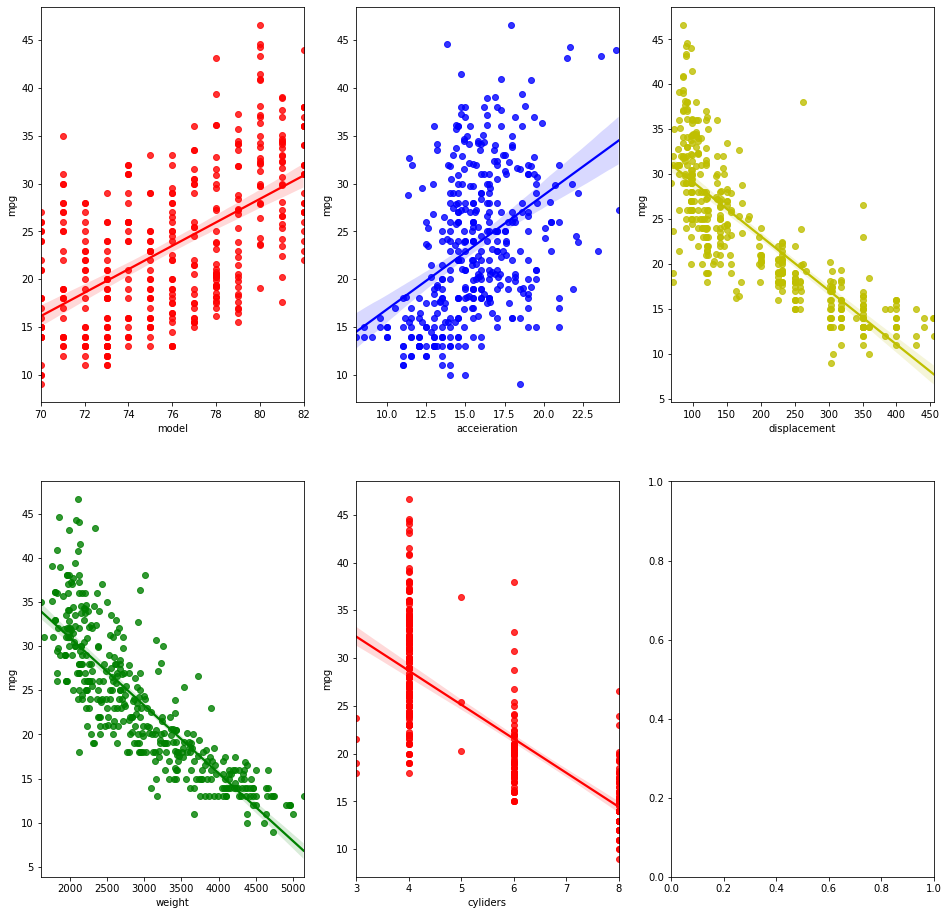

In [32]:
ig, axes = plt.subplots(2,3,figsize=(16,16))
x_feature = ['model','acceieration','displacement','weight','cyliders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_feature):
    row = int(i/3)
    col = i%3
    sns.regplot(x= feature, y='mpg', data=df, ax=axes[row][col],color=plot_color[i])